In [1]:
# Upload the Dataset

from google.colab import files
uploaded = files.upload()


Saving sonar_dataset.csv to sonar_dataset.csv


In [20]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Define the Dataset

df = pd.read_csv('sonar_dataset.csv', header = None)
print(df.head())



# Shape of the Dataset

print("\nShape :",df.shape)



# Check is there any Null

print("\n", df.isna().sum())


# Check the Unique columns

print("\nColumns :", df.columns.unique())


       0       1       2       3       4   ...      56      57      58      59  60
0  0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1  0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2  0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3  0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4  0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R

[5 rows x 61 columns]

Shape : (208, 61)

 0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Columns : Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


In [14]:
# Initialize the Dataset

x = df.drop(60, axis = 1)
y = df[60]

print(y.head())


# Convert the Word to Number

y = pd.get_dummies(y, drop_first = True)
y = y.astype(int)

print("\n",y.head())


0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

    R
0  1
1  1
2  1
3  1
4  1


In [15]:
# Split the Dataset into Train & Test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


print("Shape of X Train :", x_train.shape)
print("Shape of X Test :", x_test.shape)
print("Shape of Y Train :", y_train.shape)
print("Shape of Y Test :", y_test.shape)


Shape of X Train : (145, 60)
Shape of X Test : (63, 60)
Shape of Y Train : (145, 1)
Shape of Y Test : (63, 1)


In [16]:
# Create a Nueral Network

model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(40, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
])



# Compile

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)



# Train with Data

model.fit(x_train, y_train, epochs = 100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5015 - loss: 0.7006
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5180 - loss: 0.6830 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4982 - loss: 0.6779 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5417 - loss: 0.6577 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5927 - loss: 0.6432 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6924 - loss: 0.6252
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7441 - loss: 0.6243 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7263 - loss: 0.6053 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6959 - loss: 0.6006 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7624 - loss: 0.5567 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.5458 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7831 - los

In [17]:
# Prediction

y_pred = model.predict(x_test)


# Evaluation

Evaluation = model.evaluate(x_test, y_test)
print("Model Evaluation :", Evaluation)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8633 - loss: 0.4070 
Model Evaluation : [0.44441214203834534, 0.8730158805847168]


In [18]:
# Classification Report

print("Classification Report :", classification_report(y_test, y_pred.round()))


# Confusion Matrix

print("\nConfusion Matrix :", confusion_matrix(y_test, y_pred.round()))


Classification Report :               precision    recall  f1-score   support

           0       0.86      0.91      0.89        35
           1       0.88      0.82      0.85        28

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63


Confusion Matrix : [[32  3]
 [ 5 23]]


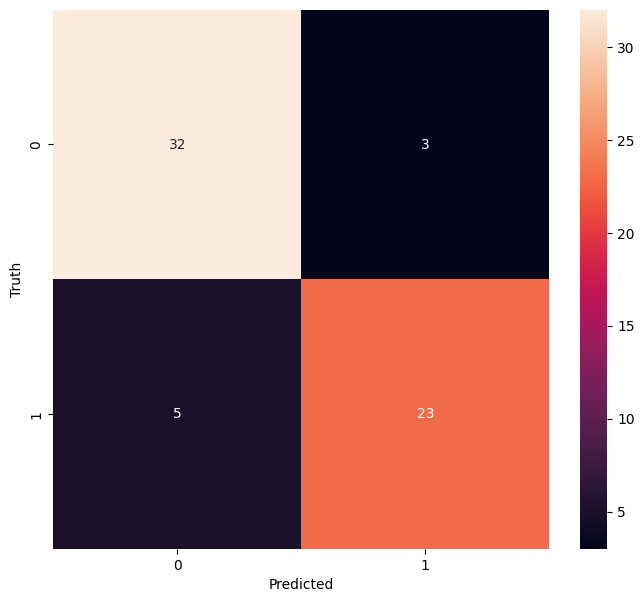

In [22]:
# Plot the Confusion Matrix

plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()


In [23]:
# Dropout Regularization

Dropout_model = keras.Sequential([
    keras.layers.Dense(60, input_dim = 60, activation = 'relu'),
    keras.layers.Dropout(0.5),                                     # ------> Dropout Neural Network 1
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dropout(0.5),                                     # ------> Dropout Neural Network 2
    keras.layers.Dense(40, activation = 'relu'),
    keras.layers.Dropout(0.5),                                     # ------> Dropout Neural Network 3
    keras.layers.Dense(1, activation = 'sigmoid')
])



# Compile

Dropout_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)



# Train with Data

Dropout_model.fit(x_train, y_train, epochs = 100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4550 - loss: 0.7452
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4035 - loss: 0.7290 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5326 - loss: 0.7227
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5343 - loss: 0.7015
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4761 - loss: 0.7111 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4994 - loss: 0.6994
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5263 - loss: 0.6992
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5107 - loss: 0.6860
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5810 - loss: 0.6792
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5018 - loss: 0.6836
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4969 - loss: 0.7024
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4773 - 

In [25]:
# Evaluation

Evaluation = Dropout_model.evaluate(x_test, y_test)
print("Dropout Model Evaluation :", Evaluation)


# Prediction

y_pred = Dropout_model.predict(x_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8527 - loss: 0.2862 
Dropout Model Evaluation : [0.2979687750339508, 0.8571428656578064]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [26]:
# Classification Report

print("Classification Report :", classification_report(y_test, y_pred.round()))


# Confusion Matrix

print("\nConfusion Matrix :", confusion_matrix(y_test, y_pred.round()))


Classification Report :               precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.88      0.79      0.83        28

    accuracy                           0.86        63
   macro avg       0.86      0.85      0.85        63
weighted avg       0.86      0.86      0.86        63


Confusion Matrix : [[32  3]
 [ 6 22]]


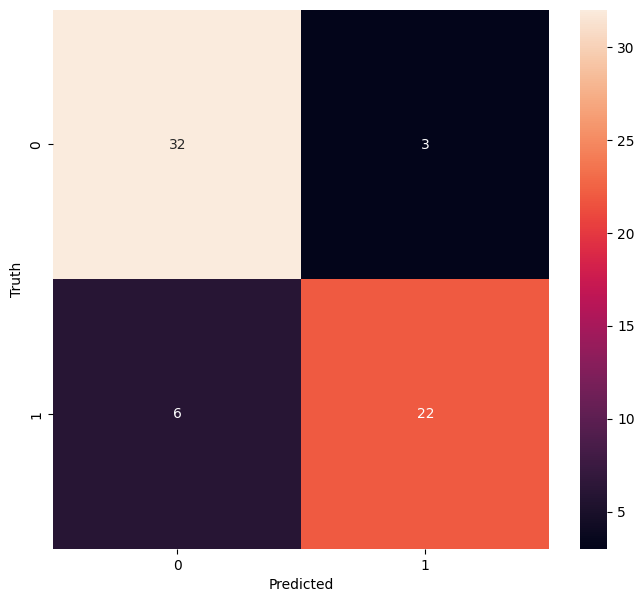

In [27]:
# Plot the Confusion Matrix

plt.figure(figsize = (8, 7))
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()
